# Cell transitions

In this example, we show how to use {func}`moscot.plotting.cell_transition`.

:::{seealso}
- See {doc}`100_push_pull` on how to plot push-forward and pull-back distributions.
- See {doc}`300_sankey` on how to plot the Sankey diagram.
:::

## Imports and data loading

In [15]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import moscot.plotting as mtp
from moscot import datasets
from moscot.problems.time import TemporalProblem

Load the {func}`~moscot.datasets.hspc` dataset.

In [16]:
adata = datasets.hspc()
adata

AnnData object with n_obs × n_vars = 4000 × 2000
    obs: 'day', 'donor', 'cell_type', 'technology', 'n_genes'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'hvg', 'neighbors', 'neighbors_atac', 'pca', 'umap'
    obsm: 'X_lsi', 'X_pca', 'X_umap_ATAC', 'X_umap_GEX', 'peaks_tfidf'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'neighbors_atac_connectivities', 'neighbors_atac_distances'

## Prepare and solve the problem

First, we need to prepare and solve the problem. Here, we set the `threshold` parameter to a relatively high value to speed up convergence at the cost of lower quality solution.

In [17]:
tp = TemporalProblem(adata).prepare(time_key="day").solve(epsilon=1e-2, threshold=1e-2)

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Solving `3` problems                                                                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(766, 1235)].                                   
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1235, 1201)].                                  
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(1201, 798)].                                   


As for all plotting functionalities in {mod}`moscot`, we first call the {meth}`~moscot.problems.time.TemporalProblem.cell_transition` method of the problem class, which stores the results of the computation in the {class}`~anndata.AnnData` instance. Let us assume we want to plot the cell transition between time point 4--7. Moreover, we want the rows and columns of our transition matrix to represent cell types. In general, we can aggregate by any categorical column in {attr}`~anndata.AnnData.obs` via the `source_groups` parameter and the `target_groups` parameter, respectively. Moreover, we are interested in
descendants as opposed to ancestors, which is why we choose `forward = True`.

In [18]:
tp.cell_transition(
    source=4,
    target=7,
    source_groups="cell_type",
    target_groups="cell_type",
    forward=True,
    key_added="cell_transition",
)

BP          EryP       HSC      MasP       MkP       MoP  \
BP    2.308763e-01  5.445565e-13  0.145888  0.285380  0.000265  0.194625   
EryP  1.241760e-12  7.082211e-01  0.000672  0.032356  0.213781  0.044970   
HSC   1.301134e-02  1.154022e-02  0.563381  0.103650  0.046381  0.077788   
MasP  7.406692e-12  1.420519e-02  0.000352  0.970003  0.007889  0.007319   
MkP   3.108959e-09  8.558109e-02  0.049507  0.185418  0.558227  0.067061   
MoP   1.132997e-12  7.344286e-02  0.000295  0.002366  0.220322  0.703554   
NeuP  7.761030e-12  5.491939e-04  0.008162  0.109118  0.003314  0.044908   

              NeuP  
BP    1.429656e-01  
EryP  3.887449e-13  
HSC   1.842484e-01  
MasP  2.307788e-04  
MkP   5.420606e-02  
MoP   2.052096e-05  
NeuP  8.339480e-01

The function saves the transition matrix to {attr}`uns['moscot_results']['cell_transition']['{key_added}'] <anndata.AnnData.uns>`.

It is also possible to aggregate by individuals cells as `source_groups`, `target_groups` or both. Here, we want the source groups to be the cells, so we pass `aggregation_mode="cell"` and `source_groups=None`. The rows in the resulting matrix are cell barcodes and the colums are cell types. This gives the likelihood of each single cell being mapped to a specific cluster.

In [19]:
tp.cell_transition(
    source=4,
    target=7,
    source_groups=None,
    target_groups="cell_type",
    forward=True,
    aggregation_mode="cell",
    key_added="cell_to_cell_type",
)

HSC           MkP          NeuP           MoP  \
6646faeca349  3.070703e-06  2.249557e-08  9.986461e-01  1.350755e-03   
83a315f89bdc  9.537811e-01  6.737983e-03  2.188746e-04  3.619146e-02   
9d9116b806de  9.045426e-01  7.665823e-06  4.860442e-02  4.674972e-02   
6c83c175ff32  9.703491e-01  1.099086e-02  1.764623e-02  1.013697e-03   
18f1b5233585  1.409097e-15  7.704851e-09  7.291150e-15  6.623527e-17   
...                    ...           ...           ...           ...   
f41351f7e128  9.752746e-01  4.017630e-06  1.139117e-03  3.388065e-05   
1d9a3b8809f6  9.187290e-01  8.105103e-02  1.781465e-05  2.018890e-04   
321744b37b5c  0.000000e+00  5.783020e-28  3.684824e-30  3.220448e-33   
f51100f61640  1.851037e-10  7.439794e-11  1.000000e+00  2.983009e-08   
666f69f1d594  2.016246e-27  0.000000e+00  5.225268e-14  1.000000e+00   

                      EryP          MasP            BP  
6646faeca349  2.314684e-24  5.767661e-08  7.740833e-28  
83a315f89bdc  1.187883e-06  3.069365e-03  1.441773e-12  
9d9116b806de  1.335694e-12  4.633884e-11  9.549022e-05  
6c83c175ff32  3.738226e-10  1.186408e-07  7.496628e-18  
18f1b5233585  2.047579e-13  1.000000e+00  2.138181e-19  
...                    ...           ...           ...  
f41351f7e128  2.378500e-13  2.354840e-02  4.914123e-09  
1d9a3b8809f6  1.850676e-09  1.533686e-07  9.590943e-08  
321744b37b5c  2.553858e-35  1.000000e+00  0.000000e+00  
f51100f61640  7.320152e-29  2.716353e-11  1.970946e-29  
666f69f1d594  0.000000e+00  0.000000e+00  0.000000e+00  

[1201 rows x 7 columns]

Analogously, we can compute the likelihoods of cell types a cell originates from by setting `source_groups="cell_type"`, `target_groups=None` and `forward=False`:

In [20]:
tp.cell_transition(
    source=4,
    target=7,
    source_groups="cell_type",
    target_groups=None,
    forward=False,
    aggregation_mode="cell",
    key_added="cell_type_to_cell",
)

45a010de2960  d3d5bb4181d5  d3e8a50c8a46  3f9844774222  66737a166e82  \
HSC   4.234188e-01  9.816411e-01  9.294160e-01  7.374105e-07  1.234406e-05   
MkP   1.413742e-01  4.882960e-04  6.864639e-02  1.442815e-08  2.537763e-04   
NeuP  1.365205e-03  1.787006e-02  1.937666e-03  1.038806e-03  9.174507e-09   
MoP   3.587727e-09  4.745976e-14  2.025467e-24  9.989604e-01  7.184339e-22   
EryP  4.341889e-03  3.048463e-23  6.108970e-29  9.814683e-24  1.083907e-08   
MasP  4.293696e-01  1.579725e-13  5.585922e-20  4.697034e-22  9.997339e-01   
BP    1.303658e-04  5.818190e-07  2.784787e-10  6.756987e-22  8.968549e-09   

      2e5e82629058  531c5a0af7e5  07b921a9a00e  fd4ebc436466  285a79857fa4  \
HSC   3.075591e-01  9.750719e-01  8.333546e-01  9.972167e-01  9.756793e-01   
MkP   4.506757e-01  2.492809e-02  6.875102e-04  2.445679e-05  2.026044e-02   
NeuP  1.114286e-20  8.517445e-12  1.599320e-01  2.758771e-03  4.060269e-03   
MoP   5.502434e-03  2.096409e-21  6.546266e-18  7.270264e-19  7.968970e-18   
EryP  2.362628e-01  1.049770e-16  6.731280e-22  2.272892e-21  2.010373e-17   
MasP  8.649193e-13  6.619282e-11  3.422012e-13  4.340160e-13  2.861642e-13   
BP    2.484709e-19  1.886490e-09  6.025940e-03  8.418083e-08  1.326892e-09   

      ...  038518e366a9  809ba84a9cbb  4264c55de7d0  a7097007fbea  \
HSC   ...  4.107326e-08  4.822306e-03  7.439283e-01  9.231182e-02   
MkP   ...  6.263088e-03  5.919814e-01  1.979516e-03  2.405828e-01   
NeuP  ...  4.917375e-18  2.704230e-19  2.535262e-01  6.560069e-09   
MoP   ...  1.650684e-08  1.491232e-01  5.659405e-04  2.042051e-02   
EryP  ...  9.937353e-01  2.540731e-01  2.150421e-25  6.283615e-01   
MasP  ...  1.650411e-06  9.839462e-16  9.062148e-20  1.832335e-02   
BP    ...  4.198042e-19  3.062798e-22  2.883456e-10  5.044563e-27   

      1381ec6cb466  946cf349f84e  da6baa1b0624  ba7d40e15f3d  69451694ec4c  \
HSC   5.305157e-10  1.012360e-02  9.981840e-01  9.930704e-01  7.514880e-01   
MkP   2.269994e-12  3.061594e-01  2.819046e-08  1.077111e-05  1.663418e-01   
NeuP  8.323468e-12  6.825680e-01  3.477891e-04  3.121623e-03  1.425974e-03   
MoP   1.541398e-26  4.286293e-17  4.230260e-05  3.797218e-03  2.642924e-11   
EryP  4.660298e-16  3.321713e-25  1.831522e-19  1.722867e-14  7.132902e-02   
MasP  1.000000e+00  4.517032e-15  1.095685e-18  3.996125e-12  9.414924e-03   
BP    1.941353e-14  1.149068e-03  1.426023e-03  2.893428e-11  3.031842e-07   

      193992d571a5  
HSC   6.609700e-03  
MkP   4.232730e-04  
NeuP  5.531022e-02  
MoP   4.646852e-09  
EryP  2.050497e-06  
MasP  9.376547e-01  
BP    1.445938e-10  

[7 rows x 798 columns]

## Plot cell transitions

The transition matrix is a data frame containing all the information needed, we now want to nicely visualize the result with {func}`moscot.plotting.cell_transition`. Therefore, we can either pass the {class}`~anndata.AnnData` instance or the problem instance. We also need to pass the `key` to the specific transition matrix we want to plot. Here, `key="cell_transition"` is the first cell transition we computed -- cell types between time points 4 and 7. Depending on the size of our transition matrix, we might want to adapt the
`dpi` and the `fontsize` parameters. If we don't want to plot the values of the transition, e.g., because the transition matrix is very large, we can simply set the `annotation = False`.

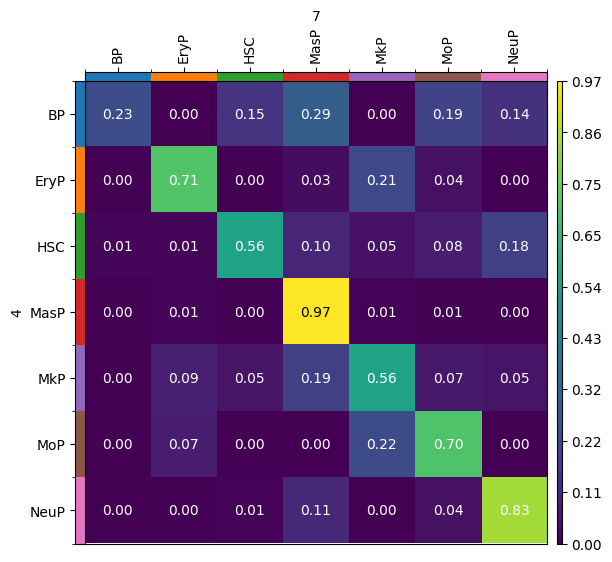

In [21]:
mtp.cell_transition(tp, dpi=100, fontsize=10, key="cell_transition")

By default, the result of the {func}`moscot.plotting.cell_transition` method of a problem instance is saved in {attr}`adata.uns['moscot_results']['cell_transition']['cell_transition'] <anndata.AnnData.uns>` and overrides this element every time the method is called. To prevent this, we can specify the parameter `key_added`, which we will do to store the results of the following use case.

We can also visualize transitions of only a subset of categories of an {attr}`~anndata.AnnData.obs` column by passing a dictionary for `source_groups` or `target_groups`. Moreover, passing a dictionary also allows to specify the order of the `source_groups` and `target_groups`, respectively.

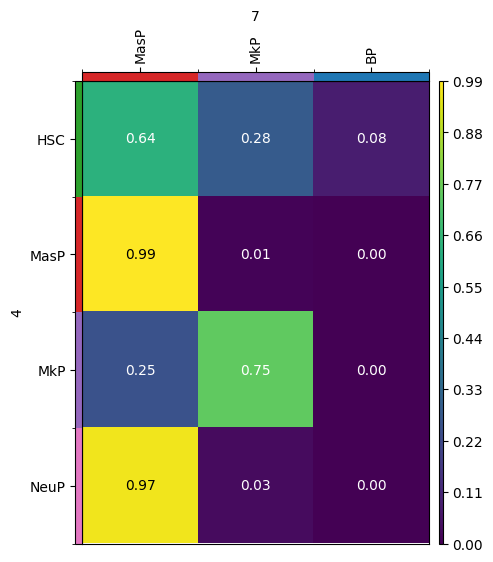

In [22]:
new_key = "subset_cell_transition"
tp.cell_transition(
    source=4,
    target=7,
    source_groups={"cell_type": ["HSC", "MasP", "MkP", "NeuP"]},
    target_groups={"cell_type": ["MasP", "MkP", "BP"]},
    forward=True,
    key_added=new_key,
)
mtp.cell_transition(tp, dpi=100, fontsize=10, key=new_key)